In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [163]:
df=pd.read_csv(r"D:\IACSD Study Material\Project\FullDataCsv\NIFTY_50__EQ__INDICES__NSE__MINUTE.csv")

In [164]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,8210.10,8211.70,8189.00,8189.55,0.0
1,2017-01-02 09:16:00+05:30,8188.75,8193.95,8188.75,8189.95,0.0
2,2017-01-02 09:17:00+05:30,8190.15,8190.75,8173.70,8173.70,0.0
3,2017-01-02 09:18:00+05:30,8173.35,8177.55,8169.15,8177.55,0.0
4,2017-01-02 09:19:00+05:30,8177.85,8178.15,8173.45,8174.40,0.0


In [166]:
#Editing TimeStamp
df["timestamp"] = df["timestamp"].apply(lambda x: x.replace("+05:30",""))

In [167]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370740 entries, 2017-01-02 09:15:00 to 2021-01-01 15:29:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    370677 non-null  float64
 1   high    370677 non-null  float64
 2   low     370677 non-null  float64
 3   close   370677 non-null  float64
 4   volume  370677 non-null  float64
dtypes: float64(5)
memory usage: 17.0 MB


In [168]:
df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00,8210.10,8211.70,8189.00,8189.55,0.0
2017-01-02 09:16:00,8188.75,8193.95,8188.75,8189.95,0.0
2017-01-02 09:17:00,8190.15,8190.75,8173.70,8173.70,0.0
2017-01-02 09:18:00,8173.35,8177.55,8169.15,8177.55,0.0
2017-01-02 09:19:00,8177.85,8178.15,8173.45,8174.40,0.0


In [169]:
df_arima=pd.DataFrame(df['close'])
df_arima

,close
timestamp,
2017-01-02 09:15:00,8189.55
2017-01-02 09:16:00,8189.95
2017-01-02 09:17:00,8173.70
2017-01-02 09:18:00,8177.55
2017-01-02 09:19:00,8174.40
...,...
2021-01-01 15:25:00,14019.00
2021-01-01 15:26:00,14019.10
2021-01-01 15:27:00,14018.15


In [170]:
df_arima=df_arima.iloc[-50001:-1,].copy()

In [171]:
df_arima

,close
timestamp,
2020-06-24 14:24:00,10410.25
2020-06-24 14:25:00,10416.45
2020-06-24 14:26:00,10408.75
2020-06-24 14:27:00,10404.50
2020-06-24 14:28:00,10407.30
...,...
2021-01-01 15:24:00,14022.70
2021-01-01 15:25:00,14019.00
2021-01-01 15:26:00,14019.10


In [31]:
df_arima.isnull().sum()

close    3
dtype: int64

In [37]:
df_arima.dropna(inplace=True)

In [42]:
df_arima.isnull().sum()
df_armia.isna().sum()

close    0
dtype: int64

## Check for Data is stationary or not using Dickey Fuller Test using Statsmodel library

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adf_test(df_arima['close'])

ADF Statistics: 0.31007357659720025
p- value: 0.9778019647761869
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [44]:
adf,pvalue,usedlag,nobs,cvalue,icbest = adfuller(df_armia['close'])
print("adf=",adf," pvalue=",pvalue,"nobs=",nobs,"cvalue=",cvalue,"icbest=",icbest)

adf= 0.31007357659720025  pvalue= 0.9778019647761869 nobs= 49985 cvalue= {'1%': -3.4304808319666407, '5%': -2.8615978250419416, '10%': -2.5668007783574445} icbest= 322377.6965566526


In [45]:
#Data is not stationary so use diffrencing

In [55]:
## Use Techniques Differencing
df_arima['close first Diffrencing']=df_arima['close']-(df_arima['close'].shift(1))

In [56]:
df_arima

,close,close first diff,close first Diffrencing
timestamp,,,
2020-06-24 14:25:00,10416.45,6.20,NaN
2020-06-24 14:26:00,10408.75,-7.70,-7.70
2020-06-24 14:27:00,10404.50,-4.25,-4.25
2020-06-24 14:28:00,10407.30,2.80,2.80
2020-06-24 14:29:00,10394.30,-13.00,-13.00
...,...,...,...
2021-01-01 15:24:00,14022.70,4.50,4.50
2021-01-01 15:25:00,14019.00,-3.70,-3.70
2021-01-01 15:26:00,14019.10,0.10,0.10


In [57]:
#Drop Na after first diffrencing

In [61]:
df_arima.isnull().sum()

close                      0
close first diff           0
close first Diffrencing    0
dtype: int64

In [63]:
df_arima.drop(['close first diff'],axis=1)

,close,close first Diffrencing
timestamp,,
2020-06-24 14:26:00,10408.75,-7.70
2020-06-24 14:27:00,10404.50,-4.25
2020-06-24 14:28:00,10407.30,2.80
2020-06-24 14:29:00,10394.30,-13.00
2020-06-24 14:30:00,10395.30,1.00
...,...,...
2021-01-01 15:24:00,14022.70,4.50
2021-01-01 15:25:00,14019.00,-3.70
2021-01-01 15:26:00,14019.10,0.10


In [64]:
df_arima.dropna(inplace=True)

In [66]:
adf_test(df_arima['close first Diffrencing'])

ADF Statistics: -69.7081658780783
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [67]:
#pValue is 0 < 0.05 thus Data is stationary

In [68]:
## 12 months 
## Use Techniques Differencing
#df_arima['close 12 Difference']=df_arima['close']-df_arima['close'].shift(12)

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

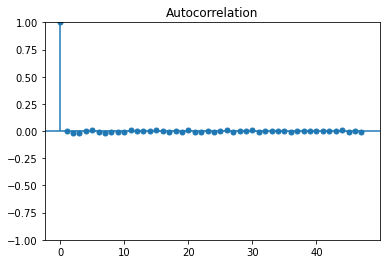

In [70]:
acf = plot_acf(df_arima["close first Diffrencing"].dropna())

D:\Python\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


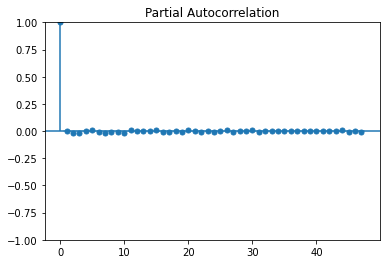

In [86]:
pacf_second = plot_pacf(df_arima["close first Diffrencing"].dropna())

In [71]:
## Use Techniques Differencing
df_arima['close second Diffrencing']=df_arima['close']-(df_arima['close'].shift(10))

In [72]:
df_arima

,close,close first diff,close first Diffrencing,close second Diffrencing
timestamp,,,,
2020-06-24 14:26:00,10408.75,-7.70,-7.70,NaN
2020-06-24 14:27:00,10404.50,-4.25,-4.25,NaN
2020-06-24 14:28:00,10407.30,2.80,2.80,NaN
2020-06-24 14:29:00,10394.30,-13.00,-13.00,NaN
2020-06-24 14:30:00,10395.30,1.00,1.00,NaN
...,...,...,...,...
2021-01-01 15:24:00,14022.70,4.50,4.50,7.70
2021-01-01 15:25:00,14019.00,-3.70,-3.70,4.80
2021-01-01 15:26:00,14019.10,0.10,0.10,7.60


In [73]:
df_arima.isnull().sum()

close                        0
close first diff             0
close first Diffrencing      0
close second Diffrencing    10
dtype: int64

In [75]:
df_arima.dropna(inplace=True)

In [76]:
adf_test(df_arima['close second Diffrencing'])

ADF Statistics: -28.01188926981279
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


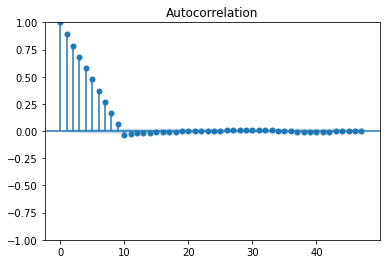

In [83]:
acf_second = plot_acf(df_arima["close second Diffrencing"].dropna())

D:\Python\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


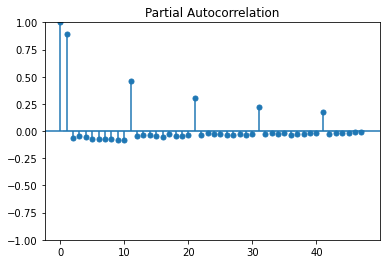

In [84]:
pacf_second = plot_pacf(df_arima["close second Diffrencing"].dropna())

In [91]:
## 12 months 
## Use Techniques Differencing
df_arima['close 12 Diffrencing']=df_arima['close']-df_arima['close'].shift(12)

In [92]:
df_arima.isnull().sum()

close                        0
close first diff             0
close first Diffrencing      0
close second Diffrencing     0
close 12 Difference          0
close 12 Diffrencing        12
dtype: int64

In [93]:
df_arima.dropna(inplace=True)

In [94]:
adf_test(df_arima['close 12 Diffrencing'])

ADF Statistics: -27.83406414943732
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


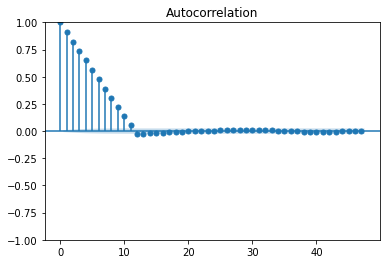

In [98]:
acf_second = plot_acf(df_arima["close 12 Diffrencing"].dropna())

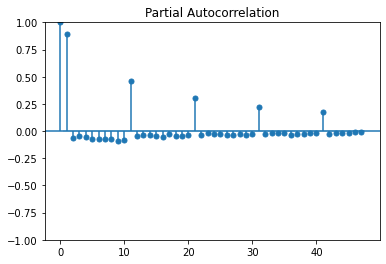

In [97]:
pacf_second = plot_pacf(df_arima["close second Diffrencing"].dropna(),method='ols')

In [104]:
df_arima.drop(['close 12 Difference'],axis=1,inplace=True)
df_arima

,close,close first diff,close first Diffrencing,close second Diffrencing,close 12 Diffrencing
timestamp,,,,,
2020-06-24 15:00:00,10339.10,7.10,7.10,8.95,1.55
2020-06-24 15:01:00,10320.65,-18.45,-18.45,-7.35,-2.40
2020-06-24 15:02:00,10329.50,8.85,8.85,12.65,-0.65
2020-06-24 15:03:00,10320.75,-8.75,-8.75,7.90,-7.25
2020-06-24 15:04:00,10315.55,-5.20,-5.20,-2.70,-1.30
...,...,...,...,...,...
2021-01-01 15:24:00,14022.70,4.50,4.50,7.70,4.05
2021-01-01 15:25:00,14019.00,-3.70,-3.70,4.80,3.05
2021-01-01 15:26:00,14019.10,0.10,0.10,7.60,4.10


In [108]:
df_arima.index.min()

Timestamp('2020-06-24 15:00:00')

In [107]:
df_arima.index.max()

Timestamp('2021-01-01 15:28:00')

In [ ]:
#374 min from 9:15 am to 3:29 pm
#374 of 1 day 
#374 * 22
#8228 rows for 1 month 
# we have 6 momths data


In [110]:
df_arima.asfreq('B').shape

(138, 5)

In [111]:
## 1 month
## Use Techniques Differencing
df_arima['close 1 month Diffrencing']=df_arima['close']-df_arima['close'].shift(8228)

In [112]:
df_arima.isnull().sum()

close                           0
close first diff                0
close first Diffrencing         0
close second Diffrencing        0
close 12 Diffrencing            0
close 1 month Diffrencing    8228
dtype: int64

In [113]:
df_arima.dropna(inplace=True)

In [115]:
adf_test(df_arima['close 1 month Diffrencing'])

ADF Statistics: -1.7990461044246675
p- value: 0.38093537902343516
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


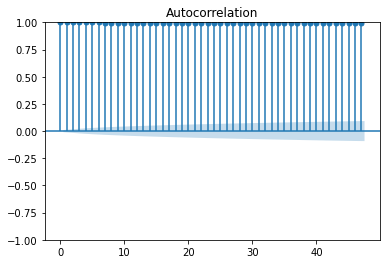

In [117]:
acf_1month = plot_acf(df_arima["close 1 month Diffrencing"].dropna())

In [121]:
## 2 months 
## Use Techniques Differencing
df_arima['close 2 month Diffrencing']=df_arima['close']-df_arima['close'].shift(16456)

In [123]:
adf_test(df_arima['close 2 month Diffrencing'].dropna())

ADF Statistics: -1.2026179748907593
p- value: 0.6724685125027042
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [124]:
## 15 days
## Use Techniques Differencing
df_arima['close 15 days Diffrencing']=df_arima['close']-df_arima['close'].shift(4114)

In [125]:
adf_test(df_arima['close 15 days Diffrencing'].dropna())

ADF Statistics: -2.0662989772422065
p- value: 0.25828002274461914
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [126]:
## 5 days 
## Use Techniques Differencing
df_arima['close 5 days Diffrencing']=df_arima['close']-df_arima['close'].shift(1870)

In [127]:
adf_test(df_arima['close 5 days Diffrencing'].dropna())

ADF Statistics: -3.0007418185083288
p- value: 0.03482518181060152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


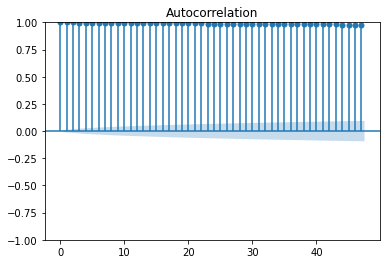

In [128]:
acf_5days = plot_acf(df_arima["close 5 days Diffrencing"].dropna())

In [129]:
## 5 days 
## Use Techniques Differencing
df_arima['close 1 day Diffrencing']=df_arima['close']-df_arima['close'].shift(374)

In [130]:
adf_test(df_arima['close 1 day Diffrencing'].dropna())

ADF Statistics: -7.077173044413735
p- value: 4.76867984763846e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


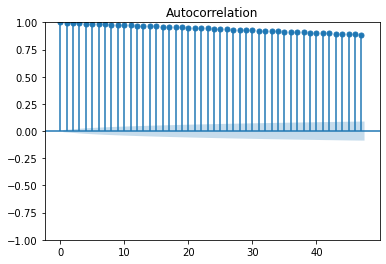

In [132]:
acf_1day = plot_acf(df_arima["close 1 day Diffrencing"].dropna())

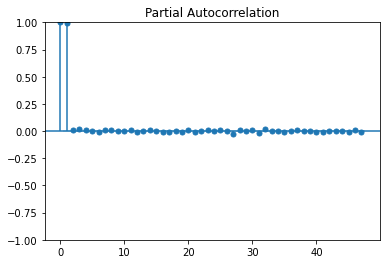

In [137]:
pacf_second = plot_pacf(df_arima["close 1 day Diffrencing"].dropna(),method='ols')

In [133]:
## 1 hour 
## Use Techniques Differencing
df_arima['close 1 hour Diffrencing']=df_arima['close']-df_arima['close'].shift(60)

In [134]:
adf_test(df_arima['close 1 hour Diffrencing'].dropna())

ADF Statistics: -24.869335716772504
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


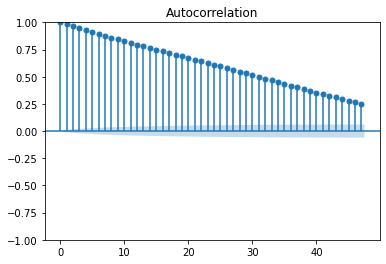

In [135]:
acf_1hour = plot_acf(df_arima["close 1 hour Diffrencing"].dropna())

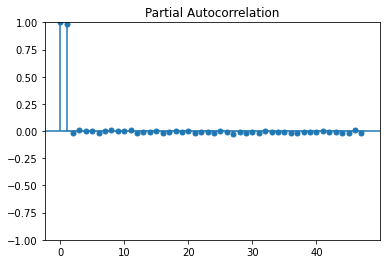

In [136]:
pacf_second = plot_pacf(df_arima["close 1 hour Diffrencing"].dropna(),method='ols')

In [138]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [179]:
#df_arima_test
df_arima.loc["2020-12-01 09:15:00":"2021-01-01 15:28:00"]
#df_arima.loc["2021-01-01 15:28:00"]
df_arima_test=pd.DataFrame(df_arima.loc["2020-12-01 09:15:00":"2021-01-01 15:28:00"])
df_arima_test.head()


,close
timestamp,
2020-12-01 09:15:00,12994.95
2020-12-01 09:16:00,12982.30
2020-12-01 09:17:00,12992.70
2020-12-01 09:18:00,12974.25
2020-12-01 09:19:00,12986.85


In [180]:
modelARIMA=ARIMA(df_arima_test['close'],order=(0,60,0))

D:\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [181]:
modelArima_fit=modelARIMA.fit()

D:\Python\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
